### Polynomiell regression
Ett _polynom_ är en form 

$\mathbb{P}(n) = a_0 + a_1x_1 + a_2x_2^2 + \ldots + a_nx_n^n$

Polynomiell regression är ett specialfall av multipel linjär regression men i en variabel:

$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $

Vi har alltså bara en parameter, men flera _features_ (sv. egenskap, oftast svengelska 'fit-sjur'). Varje kolumn är en potens av vår inparameter.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Vad är det som är linjärt här egentligen? Jo, det är multiplikation med ett tal (en _skalär_) som är linjär för polynom. Låt $\mathcal{L}(n)$ vara funktionen som multiplicerar ett polynom, säg $\mathbb{P}(2) = x²$, med $n$ -- dvs $\mathcal{L}(3) = 3x²$. Då gäller att
\begin{equation}
\mathcal{L}(a) + \mathcal{L}(b) = \mathcal{L}(a+b)
\end{equation}
Villket är ett tillräckligt villkor för linjäritet. Lite löst uttryckt är det koefficienterna som vi uppskattar så då är problemet vi löser linjärt. Precis som vid multipel regression är det flera linjer vi uppskattar -- en för varje koefficient som alltså är någon sorts viktning eller skalfaktor på varje komponent av polynomet. Det är operationerna på dessa koefficienter i regressionen som alltså är linjära.

<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}>

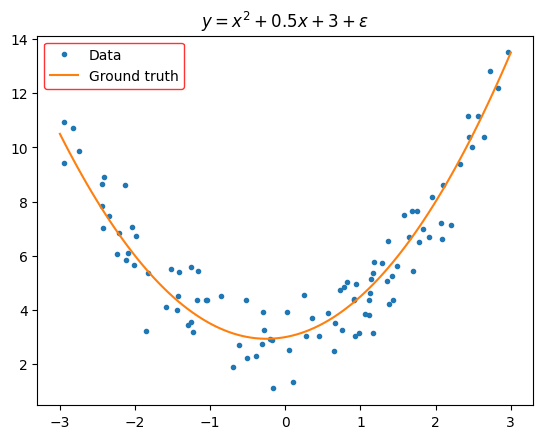

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
def ground_truth(x):
    return np.square(x) + .5*x + 3


def draw_data(X, y):
    fig = plt.figure(dpi = 100)
    ax = plt.axes()
    ax.plot(X,y, '.', label="Data")

    x = np.linspace(-3,3, samples)
    ax.plot(x, ground_truth(x), label = "Ground truth")

    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")

    return ax

samples = 100
X = np.random.uniform(-3,3, (samples,1))
y = ground_truth(X)+np.random.randn(samples,1)

draw_data(X, y)

array([[1.02127616],
       [0.39431666],
       [2.92755032]])

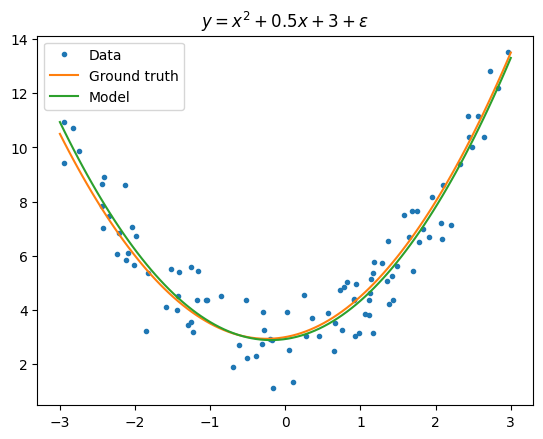

In [28]:
# Lösning med polyfit, notera att X är en lista av listor -- vi gör reshape (-1 betyder ~ "längden av listan")
beta_hat = np.polyfit(X.reshape(-1,), y, deg=2)
ax = draw_data(X, y)
x = np.linspace(-3,3, samples)
# notera att vi här applicerar modellen "manuellt" som ett andragradspolynom
ax.plot(x, beta_hat[0]*np.square(x) + beta_hat[1]*x + beta_hat[2], label="Model")
ax.legend()
beta_hat

In [29]:
# Mer generellt med sklearn

from sklearn.preprocessing import PolynomialFeatures

# 'bias' här betyder beta_0 eller intercept -- vi återkommer till denna namngivning
poly = PolynomialFeatures(degree = 2, include_bias=False)

# här applicerar vi polynommodellen först på datan, dvs vi omvandlar datan till polynomform först
# jmf med det statistika exemplet förra veckan, där en fysisk modell användes 
# för att omvandla datan
poly_features = poly.fit_transform(X)
poly_features[:4], X[:4], np.square(X[:4])


(array([[-1.4108856 ,  1.99059817],
        [-2.21382897,  4.90103869],
        [-1.23160635,  1.51685419],
        [-1.42907061,  2.0422428 ]]),
 array([[-1.4108856 ],
        [-2.21382897],
        [-1.23160635],
        [-1.42907061]]),
 array([[1.99059817],
        [4.90103869],
        [1.51685419],
        [2.0422428 ]]))

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)
model.coef_, model.intercept_

(array([[0.39431666, 1.02127616]]), array([2.92755032]))

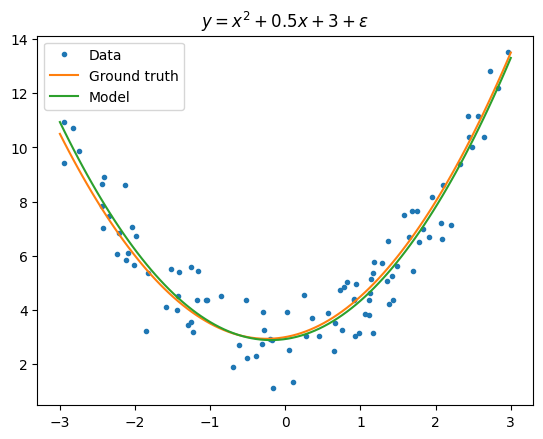

In [31]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))
# mer generellt sätt att applicera modellen för polynom
# LinearRegression behöver inte veta vad datan representerar, vi har redan omvandlat den
pred = model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred, label = "Model")
ax.legend()

[Text(0.5, 1.0, 'Underfitting, model too simple')]

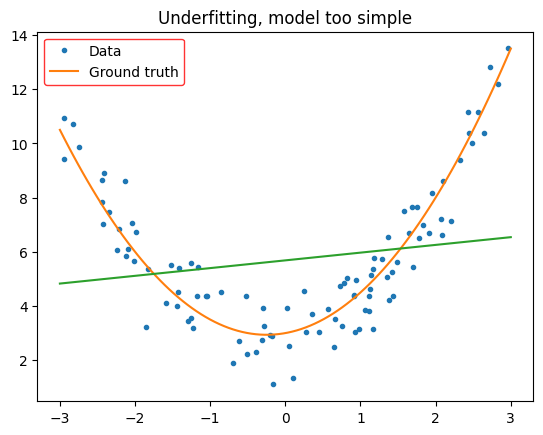

In [32]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data(X, y)
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")

(100, 30)


[Text(0.5, 1.0, 'Overfitting, model too complex'), (1.0, 15.0)]

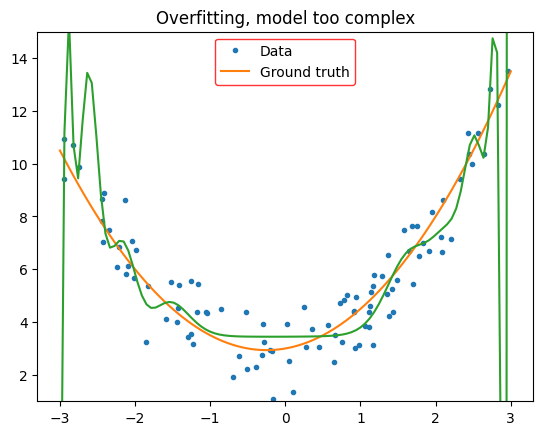

In [33]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15])

Valet av polynomets grad är vårt första exempel på en _hyperparameter_.

Hyperparameteroptimisering är ett stort område i sig, där väldigt avancerade tekniker används.

In [34]:
np.random.seed(42)


samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x ** 4 + x ** 2 + 0.5 * x + 3
y = f(X) + np.random.randn(samples, 1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

In [36]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

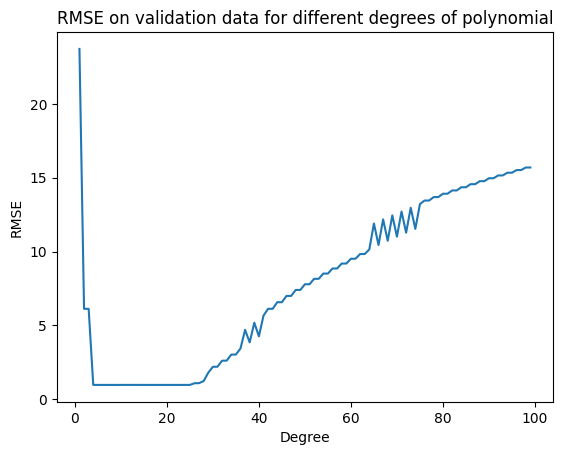

In [37]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

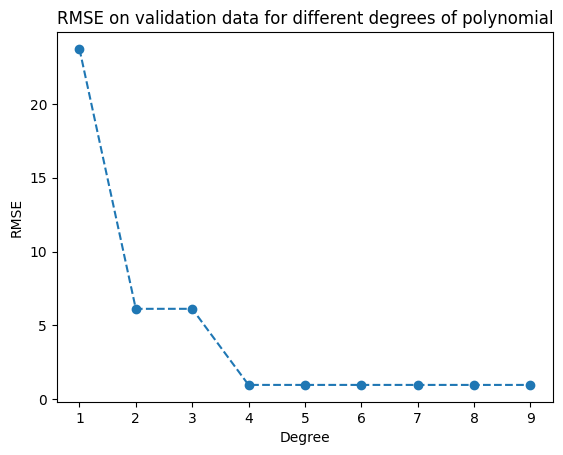

In [38]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

### Databehandling

Normalisering skalar ett värde mellan [0, 1]. Detta är relevant för alla minsta-kvadratmetoder och de flesta sorters regression. Om vissa parametrar har mycket större utslag på förutsägelsen är de förstås känsligare än andra parametrar.  

Normalisering (min-max feature scaling)

- $X' = \frac{X-X_{\mathtt{min}}}{X_{\mathtt{max}}-X_{\mathtt{min}}}$


De flesta algoritmer förlitar sig i botten på centrala gränsvärdessatsen. Därför vill vi gärna centrera datan kring noll. Detta kallas också standardisering.

Centrering (standard score scaling)

- $X' = \frac{X - \mu}{\sigma}$

Om datan är centrerad förväntar vi oss ingen $\beta_0$ och att regressionslinjen skär origo. Därav termen _bias_, dvs om det finns en sådan term är den en förfördelning bort från det förväntade värdet.

Om datan är dimensionslös eller om vi är övertygade om att datan är normalfördelad (till exempel genom ett $\chi²$ goodness-of-fit test) så är det riskfritt att datan standardiseras.  Om datans distribution är helt okänd och/eller använder olika skalor för olika parametrar (tex mikro- vs kilo) så bör datan normaliseras.

Om vi utför båda operationerna blir datan standard-normal men det kan slå väldigt slint om datan har dolda beroenden i sig. Här räcker dock inte teknikerna vi använt hittills för att undvika detta -- detta är en inneboende begränsning hos minsta-kvadrat metoder. Om datan inte är normalfördelad kring ett underliggande oberoende samband, tex genom djupa korrelationer mellan olika parametrar, så kommer MK-metoder helt enkelt inte hitta någon bra lösning. Ofta undviker vi därför standardisering i Ordinär Minsta Kvadrat (OLS), åtminstone utan djupare statistisk analys.

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0)

print(f"{df.shape[0]} samples")
print(f"{df.shape[1]-1} features") # subtract one as price_unit_area is the label and not    


X, y = df.drop("Sales", axis="columns"), df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# we use normalization here
# instantiate an object from the class MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # use the training data to fit the scaler

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}")

200 samples
3 features
0.00 ≤ scaled_X_train ≤ 1.00
0.01 ≤ scaled_X_test ≤ 1.13


### Utvärdering, riktvärden

\begin{equation}
\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^n{(y_i -\hat{y}_i)²}
\end{equation}

\begin{equation}
\mathrm{RSS} = \sum_{i=1}^n{(y_i -\hat{y}_i)²}
\end{equation}

MSE = Bias² + Varians + Brus (irreducibelt fel)